## 例題

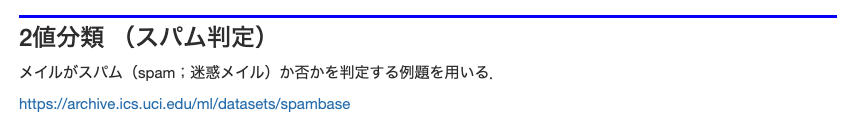

In [1]:
from IPython.display import Image
Image('spam-emails.png')

## 解答

In [2]:
import pandas as pd

In [3]:
spam = pd.read_csv('http://logopt.com/data/spam.csv')
spam.head().T

,0,1,2,3,4
word_freq_make,0.210,0.060,0.000,0.000,0.000
word_freq_address,0.280,0.000,0.000,0.000,0.000
word_freq_all,0.500,0.710,0.000,0.000,0.000
word_freq_3d,0.000,0.000,0.000,0.000,0.000
word_freq_our,0.140,1.230,0.630,0.630,1.850
word_freq_over,0.280,0.190,0.000,0.000,0.000
word_freq_remove,0.210,0.190,0.310,0.310,0.000
word_freq_internet,0.070,0.120,0.630,0.630,1.850
word_freq_order,0.000,0.640,0.310,0.310,0.000
word_freq_mail,0.940,0.250,0.630,0.630,0.000


In [4]:
X = spam.drop('is_spam', axis=1)
y = spam.is_spam

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X, y)

LogisticRegression(solver='liblinear')

### 可視化

#### 混合行列

In [6]:
from yellowbrick.classifier import ConfusionMatrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


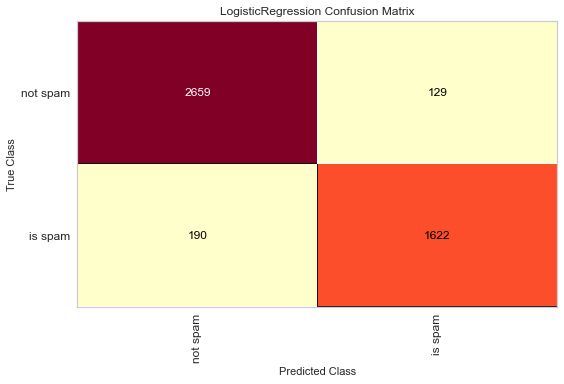

In [7]:
cm = ConfusionMatrix(logreg, classes=['not spam', 'is spam'])

cm.fit(X, y)
cm.score(X, y)
cm.show();

#### 評価尺度（メトリクス）

In [8]:
TP, FN, FP, TN = 2665, 123, 190, 1622
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision=', precision)
print('recall=', recall)
print('F1 score=', 2 / (1/precision + 1/recall))

precision= 0.9334500875656743
recall= 0.9558823529411765
F1 score= 0.9445330497962077


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


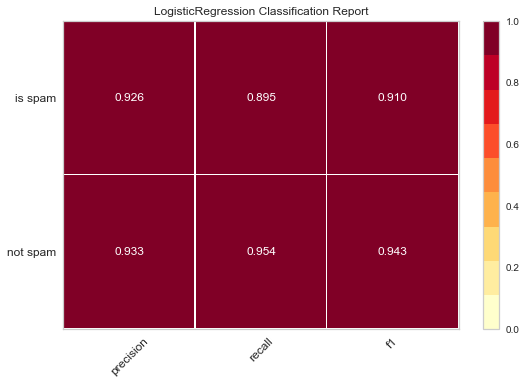

In [9]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(logreg, classes=['not spam', 'is spam'])

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

#### 閾値 (threshold)を変えてみる

In [10]:
from yellowbrick.classifier import DiscriminationThreshold

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, b

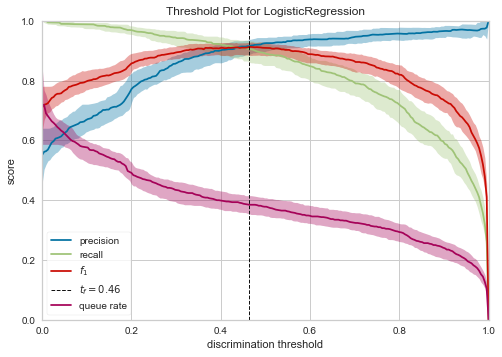

In [11]:
visualizer = DiscriminationThreshold(logreg)

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

#### ROC曲線とAUC

In [12]:
from yellowbrick.classifier import ROCAUC

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


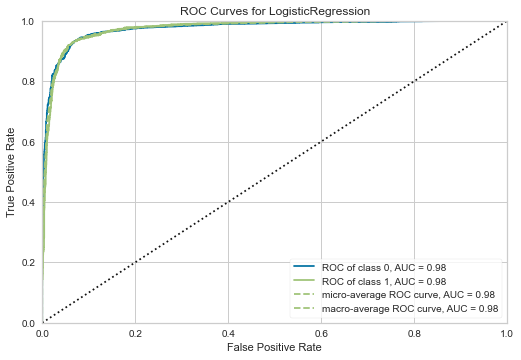

In [13]:
visualizer = ROCAUC(logreg, size=(600, 400))

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();